# **Extracción automática de términos**

# Enfoque lingüístico

El primer paso es cargar las librerías necesarias para llevar a cabo el procesamiento de los datos.

Después, la función "extract_terms" toma como entrada un texto y devuelve una lista de tuplas con los 10 términos más relevantes con sus respectivas frecuencias.

In [1]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import spacy
# Cargar el modelo de spaCy para el idioma inglés
nlp = spacy.load("en_core_web_sm", disable = ["parser", "ner"])

def extract_terms(text):
    doc = nlp(text)
    # Obtener las raíces de las palabras y las etiquetas gramaticales
    lemmas_tags = [(token.lemma_, token.pos_) for token in doc]
    # Filtrar solo los nombres, verbos, adjetivos y adverbios
    filtered_lemmas_tags = [(lemma, tag) for lemma, tag in lemmas_tags if tag in ["NOUN", "VERB", "ADJ", "ADV"]]
    filtered_lemmas = [lemma for lemma, tag in filtered_lemmas_tags]
    # Aplicar una lista de exclusión
    stop_words = set(stopwords.words("english"))
    terms = [lemma for lemma in filtered_lemmas if lemma not in stop_words]
    # Calcular frecuencias
    freq_dist = nltk.FreqDist(terms)

    return freq_dist.most_common(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Ahora, se incorporará el dataset, que en este caso son cinco textos extraídos de la Wikipedia, a través de Google Drive.

Estos cinco textos tienen más o menos la misma longitud y el tema que tienen en común es la lingüística. Hablan sobre cinco corrientes lingüísticas.

In [2]:
from google.colab import drive

drive.mount('/content/drive')
structural_dataset_file = '/content/drive/MyDrive/Máster NLP UR/Tarea Final/structural_ling.txt'
functional_dataset_file = '/content/drive/MyDrive/Máster NLP UR/Tarea Final/functional_ling.txt'
evolutionary_dataset_file = '/content/drive/MyDrive/Máster NLP UR/Tarea Final/evolutionary_ling.txt'
historical_dataset_file = '/content/drive/MyDrive/Máster NLP UR/Tarea Final/historical_ling.txt'
comparative_dataset_file = '/content/drive/MyDrive/Máster NLP UR/Tarea Final/comparative_ling.txt'

Mounted at /content/drive


Aquí se le asigna a cada documento .txt el nombre con el que se trabajará en el código.

In [4]:
structural_dataset, functional_dataset, evolutionary_dataset, historical_dataset, comparative_dataset = '', '', '', '',''

with open(structural_dataset_file) as f:
  structural_dataset = f.readline()
with open(functional_dataset_file) as f:
  functional_dataset = f.readline()
with open(evolutionary_dataset_file) as f:
  evolutionary_dataset = f.readline()
with open(historical_dataset_file) as f:
  historical_dataset = f.readline()
with open(comparative_dataset_file) as f:
  comparative_dataset = f.readline()

In [5]:
structural_dataset

"Structural linguistics, or structuralism, in linguistics, denotes schools or theories in which language is conceived as a self-contained, self-regulating semiotic system whose elements are defined by their relationship to other elements within the system. It is derived from the work of Swiss linguist Ferdinand de Saussure and is part of the overall approach of structuralism. Saussure's Course in General Linguistics, published posthumously in 1916, stressed examining language as a dynamic system of interconnected units. Saussure is also known for introducing several basic dimensions of semiotic analysis that are still important today. Two of these are his key methods of syntagmatic and paradigmatic analysis, which define units syntactically and lexically, respectively, according to their contrast with the other units in the system.\n"

In [6]:
functional_dataset

"Functional linguistics is an approach to the study of language characterized by taking systematically into account the speaker's and the hearer's side, and the communicative needs of the speaker and of the given language community. Linguistic functionalism spawned in the 1920s to 1930s from Ferdinand de Saussure's systematic structuralist approach to language (1916).\n"

In [7]:
evolutionary_dataset

'Evolutionary linguistics or Darwinian linguistics is a sociobiological approach to the study of language. Evolutionary linguists consider linguistics as a subfield of sociobiology and evolutionary psychology. The approach is also closely linked with evolutionary anthropology, cognitive linguistics and biolinguistics. Studying languages as the products of nature, it is interested in the biological origin and development of language. Evolutionary linguistics is contrasted with humanistic approaches, especially structural linguistics.\n'

In [8]:
historical_dataset

'Historical linguistics, also termed diachronic linguistics, is the scientific study of language change over time. Principal concerns of historical linguistics include:\n'

In [9]:
comparative_dataset

'Comparative linguistics is a branch of historical linguistics that is concerned with comparing languages to establish their historical relatedness.\n'

Como se ha mencionado antes, esta función extrae tuplas con los 10 términos más relevantes del texto deseado junto con su frecuencia.

In [10]:
extracted_terms = extract_terms(structural_dataset)
extracted_terms

[('system', 4),
 ('unit', 3),
 ('linguistic', 2),
 ('structuralism', 2),
 ('language', 2),
 ('self', 2),
 ('semiotic', 2),
 ('element', 2),
 ('define', 2),
 ('saussure', 2)]

In [11]:
extracted_terms = extract_terms(functional_dataset)
extracted_terms

[('language', 3),
 ('linguistic', 2),
 ('approach', 2),
 ('speaker', 2),
 ('functional', 1),
 ('study', 1),
 ('characterize', 1),
 ('take', 1),
 ('systematically', 1),
 ('account', 1)]

In [12]:
extracted_terms = extract_terms(evolutionary_dataset)
extracted_terms

[('linguistic', 6),
 ('evolutionary', 5),
 ('approach', 3),
 ('language', 3),
 ('study', 2),
 ('darwinian', 1),
 ('sociobiological', 1),
 ('linguist', 1),
 ('consider', 1),
 ('subfield', 1)]

In [13]:
extracted_terms = extract_terms(historical_dataset)
extracted_terms

[('linguistic', 3),
 ('historical', 2),
 ('also', 1),
 ('term', 1),
 ('diachronic', 1),
 ('scientific', 1),
 ('study', 1),
 ('language', 1),
 ('change', 1),
 ('time', 1)]

In [15]:
extracted_terms = extract_terms(comparative_dataset)
extracted_terms

[('linguistic', 2),
 ('historical', 2),
 ('comparative', 1),
 ('branch', 1),
 ('concern', 1),
 ('compare', 1),
 ('language', 1),
 ('establish', 1),
 ('relatedness', 1)]

# Enfoque estadístico

**1. Medidas de coherencia sintagmática de los términos**

Ahora, se empleará un enfoque estadístico basado en PMI, chi-square y likelihood ratio.

Para ello, a través de las librerías spaCy y NLTK, primero se tokenizará y lematizará y, luego, se excluirán palabras de clases gramaticales y stopwords. Esto se hará con cada texto.

Depués, se calculará la medida de asociación de bigramas (PMI) y, una vez hecho esto, se imprimirán los bigramas con su puntuación.

In [16]:
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures

doc = nlp(structural_dataset)
# Obtener las raíces de las palabras y las etiquetas gramaticales
lemmas_tags = [(token.lemma_, token.pos_) for token in doc]
# Filtrar solo los nombres, verbos, adjetivos y adverbios
filtered_lemmas_tags = [(lemma, tag) for lemma, tag in lemmas_tags if tag in ["NOUN", "VERB", "ADJ", "ADV"]]
filtered_lemmas = [lemma for lemma, tag in filtered_lemmas_tags]
# Aplicar una lista de exclusión
stop_words = set(stopwords.words("english"))
terms = [lemma for lemma in filtered_lemmas if lemma not in stop_words]
print(terms)

['structural', 'linguistic', 'structuralism', 'linguistic', 'denote', 'school', 'theory', 'language', 'conceive', 'self', 'contain', 'self', 'regulate', 'semiotic', 'system', 'element', 'define', 'relationship', 'element', 'system', 'derive', 'work', 'swiss', 'linguist', 'part', 'overall', 'approach', 'structuralism', 'saussure', 'course', 'publish', 'posthumously', 'stress', 'examine', 'language', 'dynamic', 'system', 'interconnect', 'unit', 'saussure', 'also', 'know', 'introduce', 'several', 'basic', 'dimension', 'semiotic', 'analysis', 'still', 'important', 'today', 'key', 'method', 'syntagmatic', 'paradigmatic', 'analysis', 'define', 'unit', 'syntactically', 'lexically', 'respectively', 'accord', 'contrast', 'unit', 'system']


In [17]:
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures

doc = nlp(functional_dataset)
# Obtener las raíces de las palabras y las etiquetas gramaticales
lemmas_tags = [(token.lemma_, token.pos_) for token in doc]
# Filtrar solo los nombres, verbos, adjetivos y adverbios
filtered_lemmas_tags = [(lemma, tag) for lemma, tag in lemmas_tags if tag in ["NOUN", "VERB", "ADJ", "ADV"]]
filtered_lemmas = [lemma for lemma, tag in filtered_lemmas_tags]
# Aplicar una lista de exclusión
stop_words = set(stopwords.words("english"))
terms = [lemma for lemma in filtered_lemmas if lemma not in stop_words]
print(terms)

['functional', 'linguistic', 'approach', 'study', 'language', 'characterize', 'take', 'systematically', 'account', 'speaker', 'hearer', 'side', 'communicative', 'need', 'speaker', 'give', 'language', 'community', 'linguistic', 'functionalism', 'spawn', 'systematic', 'structuralist', 'approach', 'language']


In [18]:
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures

doc = nlp(evolutionary_dataset)
# Obtener las raíces de las palabras y las etiquetas gramaticales
lemmas_tags = [(token.lemma_, token.pos_) for token in doc]
# Filtrar solo los nombres, verbos, adjetivos y adverbios
filtered_lemmas_tags = [(lemma, tag) for lemma, tag in lemmas_tags if tag in ["NOUN", "VERB", "ADJ", "ADV"]]
filtered_lemmas = [lemma for lemma, tag in filtered_lemmas_tags]
# Aplicar una lista de exclusión
stop_words = set(stopwords.words("english"))
terms = [lemma for lemma in filtered_lemmas if lemma not in stop_words]
print(terms)

['evolutionary', 'linguistic', 'darwinian', 'linguistic', 'sociobiological', 'approach', 'study', 'language', 'evolutionary', 'linguist', 'consider', 'linguistic', 'subfield', 'sociobiology', 'evolutionary', 'psychology', 'approach', 'also', 'closely', 'link', 'evolutionary', 'anthropology', 'cognitive', 'linguistic', 'biolinguistic', 'study', 'language', 'product', 'nature', 'interested', 'biological', 'origin', 'development', 'language', 'evolutionary', 'linguistic', 'contrast', 'humanistic', 'approach', 'especially', 'structural', 'linguistic']


**1.1. PMI**

PMI mide la relación entre dos términos y su probabilidad de aparecer juntas dentro del contexto dado.

Los valores más elevados indican que los dos términos aparecen juntos con mayor frecuencia que si fuesen independientes. En cambio, los valores más bajos indican que los dos términos aparecen juntos con menos frecuencia que si fuesen independientes.

In [19]:
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(terms)
print('Extract terms using PMI: ')
for i in finder.score_ngrams(bigram_measures.pmi):
    print(i)

Extract terms using PMI: 
(('also', 'closely'), 5.392317422778761)
(('anthropology', 'cognitive'), 5.392317422778761)
(('biological', 'origin'), 5.392317422778761)
(('closely', 'link'), 5.392317422778761)
(('contrast', 'humanistic'), 5.392317422778761)
(('especially', 'structural'), 5.392317422778761)
(('interested', 'biological'), 5.392317422778761)
(('linguist', 'consider'), 5.392317422778761)
(('nature', 'interested'), 5.392317422778761)
(('origin', 'development'), 5.392317422778761)
(('product', 'nature'), 5.392317422778761)
(('subfield', 'sociobiology'), 5.392317422778761)
(('biolinguistic', 'study'), 4.392317422778761)
(('approach', 'also'), 3.8073549220576046)
(('approach', 'especially'), 3.8073549220576046)
(('development', 'language'), 3.8073549220576046)
(('humanistic', 'approach'), 3.8073549220576046)
(('language', 'product'), 3.8073549220576046)
(('psychology', 'approach'), 3.8073549220576046)
(('sociobiological', 'approach'), 3.8073549220576046)
(('study', 'language'), 3.8

Como se puede ver, la salida muestra la lista de brigramas ordenados segun su puntuación PMI.

**1.2. Chi Square**

El test chi-square mide la relación entre dos palabras (bigramas) en un conjunto de texto. El valor del chi-square indica cómo de probable es que las dos palabras aparezcan juntas en el texto en comparación con la probabilidad de que aparezcan por separado.

Así, los valores más elevados de chi square indica una relación mas fuerte entre dos palabras en el texto, y se considera que estas palabras tienen una relación semántica significativa en el texto.

In [20]:
print('Extract terms using chi square:')
for i in finder.score_ngrams(bigram_measures.chi_sq):
    print(i)

Extract terms using chi square:
(('also', 'closely'), 42.0)
(('anthropology', 'cognitive'), 42.0)
(('biological', 'origin'), 42.0)
(('closely', 'link'), 42.0)
(('contrast', 'humanistic'), 42.0)
(('especially', 'structural'), 42.0)
(('interested', 'biological'), 42.0)
(('linguist', 'consider'), 42.0)
(('nature', 'interested'), 42.0)
(('origin', 'development'), 42.0)
(('product', 'nature'), 42.0)
(('subfield', 'sociobiology'), 42.0)
(('study', 'language'), 27.3)
(('biolinguistic', 'study'), 20.48780487804878)
(('approach', 'also'), 13.317073170731707)
(('approach', 'especially'), 13.317073170731707)
(('development', 'language'), 13.317073170731707)
(('humanistic', 'approach'), 13.317073170731707)
(('language', 'product'), 13.317073170731707)
(('psychology', 'approach'), 13.317073170731707)
(('sociobiological', 'approach'), 13.317073170731707)
(('language', 'evolutionary'), 9.238253638253639)
(('evolutionary', 'anthropology'), 7.580487804878048)
(('evolutionary', 'linguist'), 7.5804878048

**1.3. Log Likelihood Ratio**

El log-likelihood ratio determina la relación de dependencia entre dos palabras en un texto. Compara la probabilidad de que dos palabras aparezcan juntas en un texto con la probabilidad de que aparezcan juntas en un corpus de textos aleatorio.
El valor de log-likelihood es mayores cuando dos palabras aparecen juntas con más frecuencia de lo que se esperaría en un corpus de textos aleatorio, y los valores son más bajos cuando dos palabras aparecen juntas con menos frecuencia de lo esperado. Los valores más altos indican una fuerte relación entre las dos palabras y se considera más relevantes. Los valores más bajos indican una relación débil o ninguna relación entre las dos palabras.

In [21]:
print('Extract terms using likelihood ratio:')
for i in finder.score_ngrams(bigram_measures.likelihood_ratio):
    print(i)

Extract terms using likelihood ratio:
(('study', 'language'), 12.262217874679362)
(('also', 'closely'), 9.4513384660497)
(('anthropology', 'cognitive'), 9.4513384660497)
(('biological', 'origin'), 9.4513384660497)
(('closely', 'link'), 9.4513384660497)
(('contrast', 'humanistic'), 9.4513384660497)
(('especially', 'structural'), 9.4513384660497)
(('interested', 'biological'), 9.4513384660497)
(('linguist', 'consider'), 9.4513384660497)
(('nature', 'interested'), 9.4513384660497)
(('origin', 'development'), 9.4513384660497)
(('product', 'nature'), 9.4513384660497)
(('subfield', 'sociobiology'), 9.4513384660497)
(('biolinguistic', 'study'), 6.678749743809918)
(('language', 'evolutionary'), 5.690087168756608)
(('approach', 'also'), 5.632253456280822)
(('approach', 'especially'), 5.632253456280822)
(('development', 'language'), 5.632253456280822)
(('humanistic', 'approach'), 5.632253456280822)
(('language', 'product'), 5.632253456280822)
(('psychology', 'approach'), 5.632253456280822)
(('so

**2. Medidas de terminologización (termhood)**

**2.1. TF-IDF**

Con esta medida, cada término aparece una sola vez en la tabla con su puntuación (score), que indica la importancia relativa del término en relación con el resto de términos del conjunto de documentos.

Un término con una puntuación elevada indica que ese término es relevante en el conjunto de documentos, ya que aparece con una frecuencia más alta en algunos documentos y con una frecuencia baja en otros.

Así, en las siguientes líneas de código se creará el onjeto TfidfVectorizer y se ajustará al conjunto de documentos para luego obtener los nombres de los términos y las puntuación TF-IDF de cada uno de ellos. Además, se ordenará de mayor a menor puntuación.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

texts = [structural_dataset,functional_dataset,evolutionary_dataset,historical_dataset,comparative_dataset]

texts_lem = []
for text in texts:
    # Procesar el texto con spaCy
    doc = nlp(text)
    # Obtener las raíces de las palabras y las etiquetas gramaticales
    lemmas_tags = [(token.lemma_, token.pos_) for token in doc]
    # Filtrar solo los nombres, verbos, adjetivos y adverbios
    filtered_lemmas_tags = [(lemma, tag) for lemma, tag in lemmas_tags if tag in ["NOUN", "VERB", "ADJ", "ADV"]]
    filtered_lemmas = [lemma for lemma, tag in filtered_lemmas_tags]
    # Unir las palabras lematizadas en una cadena
    text_lem = " ".join(filtered_lemmas)
    texts_lem.append(text_lem)

# Instanciar el vectorizador TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english")

# Ajustar el vectorizador al conjunto de documentos
X = vectorizer.fit_transform(texts_lem)

# Obtener los nombres de los términos (features)
features = vectorizer.get_feature_names_out()

# Obtener los scores tf-idf de cada término
scores = X.toarray().flatten()

# Crear una tabla (lista de tuplas) con los términos y sus respectivos scores tf-idf
scores_table = [(features[i], scores[i]) for i in range(len(features))]

# Ordenar la tabla de acuerdo a los scores tf-idf (de mayor a menor)
scores_table = sorted(scores_table, key=lambda x: x[1], reverse=True)

# Imprimir elementos de la tabla
for term, score in scores_table:
    print("Term:", term, "| Score:", score)

Term: unit | Score: 0.3506010012029077
Term: analysis | Score: 0.23373400080193846
Term: define | Score: 0.23373400080193846
Term: element | Score: 0.23373400080193846
Term: saussure | Score: 0.23373400080193846
Term: self | Score: 0.23373400080193846
Term: semiotic | Score: 0.23373400080193846
Term: structuralism | Score: 0.23373400080193846
Term: accord | Score: 0.11686700040096923
Term: basic | Score: 0.11686700040096923
Term: conceive | Score: 0.11686700040096923
Term: contain | Score: 0.11686700040096923
Term: course | Score: 0.11686700040096923
Term: denote | Score: 0.11686700040096923
Term: derive | Score: 0.11686700040096923
Term: dimension | Score: 0.11686700040096923
Term: dynamic | Score: 0.11686700040096923
Term: examine | Score: 0.11686700040096923
Term: important | Score: 0.11686700040096923
Term: interconnect | Score: 0.11686700040096923
Term: introduce | Score: 0.11686700040096923
Term: key | Score: 0.11686700040096923
Term: know | Score: 0.11686700040096923
Term: lexic

Los términos con valores más altos de TF-IDF son considerados más importantes en este conjunto de documentos.

**2.2. Coeficiente de rareza**

El coeficiente de rareza de un término es la rareza o frecuencia relativa de ese término en relación con el resto de los términos en el conjunto de documentos.

Un término con un coeficiente de rareza más alto indica que aparece con poca frecuencia en el conjunto de documentos. En cambio, un término con un coeficiente de rareza baj, e incluso negativo, quiere decir que este aparece con mayor frecuencia en el conjunto de documentos.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Instanciar el vectorizador CountVectorizer
vectorizer = CountVectorizer(stop_words="english")

# Ajustar el vectorizador al conjunto de documentos
X = vectorizer.fit_transform(texts_lem)

# Obtener los nombres de los términos (features)
features = vectorizer.get_feature_names_out()

# Obtener la frecuencia de documentos para cada término
document_frequency = np.array(X.sum(axis=0))[0]

# Calcular el coeficiente de rareza de cada término
total_documents = X.shape[0]
rareness = (1 - (document_frequency / total_documents))

# Crear una tabla (lista de tuplas) con los términos y sus respectivos coeficientes de rareza
rareness_table = [(features[i], rareness[i]) for i in range(len(features))]

# Ordenar la tabla de acuerdo a los coeficientes de rareza (de mayor a menor)
rareness_table = sorted(rareness_table, key=lambda x: x[1], reverse=True)

# Imprimir elementos de la tabla
for term, score in rareness_table:
    print("Term:", term, "| Score:", score)

Term: accord | Score: 0.8
Term: account | Score: 0.8
Term: anthropology | Score: 0.8
Term: basic | Score: 0.8
Term: biolinguistic | Score: 0.8
Term: biological | Score: 0.8
Term: branch | Score: 0.8
Term: change | Score: 0.8
Term: characterize | Score: 0.8
Term: closely | Score: 0.8
Term: cognitive | Score: 0.8
Term: communicative | Score: 0.8
Term: community | Score: 0.8
Term: comparative | Score: 0.8
Term: compare | Score: 0.8
Term: conceive | Score: 0.8
Term: consider | Score: 0.8
Term: contain | Score: 0.8
Term: course | Score: 0.8
Term: darwinian | Score: 0.8
Term: denote | Score: 0.8
Term: derive | Score: 0.8
Term: development | Score: 0.8
Term: diachronic | Score: 0.8
Term: dimension | Score: 0.8
Term: dynamic | Score: 0.8
Term: especially | Score: 0.8
Term: establish | Score: 0.8
Term: examine | Score: 0.8
Term: functional | Score: 0.8
Term: functionalism | Score: 0.8
Term: hearer | Score: 0.8
Term: humanistic | Score: 0.8
Term: important | Score: 0.8
Term: include | Score: 0.8

**2.3. Índice de relevancia**

El índice de relevancia indica la importancia de un término en un conjunto de documentos. Determina los términos más representativos en un conjunto de documentos y su importancia dentro de estos documentos.

El índice de relevancia se basa en que un término que aparece con frecuencia en un documento específico, pero no en otros documentos del conjunto, es un término relevante para ese documento. No obstante, un término que aparece con frecuencia en todos los documentos del conjunto se considera un término no relevante, ya que no ayuda a caracterizar a ningún documento en particular.


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define los parámetros del vectorizador
vectorizer = TfidfVectorizer(ngram_range=(1, 3), stop_words="english")

# Aplica el vectorizador al corpus de texto
X = vectorizer.fit_transform(texts_lem)

# Obtiene las características (términos) del corpus
features = vectorizer.get_feature_names_out()

# Obtiene el índice de relevancia de cada término
relevance_scores = X.sum(axis=0).A1

# Crea una tabla (lista de tuplas) con los términos y sus respectivos índices de relevancia
relevance_table = [(features[i], relevance_scores[i]) for i in range(len(features))]

# Ordena la tabla de acuerdo al índice de relevancia (de mayor a menor)
relevance_table = sorted(relevance_table, key=lambda x: x[1], reverse=True)

# Imprime la tabla de términos relevantes
print("Term\t\tRelevance score")
for term, score in relevance_table:
    print("{}\t\t{}".format(term, score))

Term		Relevance score
linguistic		0.8367438881580337
historical		0.5597657054342502
language		0.5379299454246487
evolutionary		0.4170320042203386
historical linguistic		0.40740694527480603
approach		0.38853757368785724
study		0.3033597069186949
study language		0.3033597069186949
concern		0.2798828527171251
speaker		0.2561899957120327
unit		0.22124192396247214
branch		0.18884475610153637
branch historical		0.18884475610153637
branch historical linguistic		0.18884475610153637
comparative		0.18884475610153637
comparative linguistic		0.18884475610153637
comparative linguistic branch		0.18884475610153637
compare		0.18884475610153637
compare language		0.18884475610153637
compare language establish		0.18884475610153637
concern compare		0.18884475610153637
concern compare language		0.18884475610153637
establish		0.18884475610153637
establish historical		0.18884475610153637
establish historical relatedness		0.18884475610153637
historical linguistic concern		0.18884475610153637
historical relate

Así, el resultado muestra las palabras más relevantes dentro de los textos que forman el conjunto junto con su puntaje de relevancia.
Los términos con una puntuación de relevancia más alta son considerados más importantes o relevantes en relación con el conjunto de datos.

## **MODELADO DE TEMAS**

**1. Latent Semantic Analysis (LSA)**

Aquí hay un ejemplo de código de una implementación sencilla de topic modeling con latent semantic analysis (LSA) utilizando scikit-learn en Python. Este código utiliza la clase TfidfVectorizer de scikit-learn para crear una matriz de términos-documentos a partir de un conjunto de documentos de entrada. Luego, utiliza la clase TruncatedSVD para realizar la reducción de dimensionalidad de la matriz de términos-documentos utilizando LSA. El número de componentes especificado (en este caso, 2) determina el número de temas que se extraen.

En este caso, se empleará la clase TfidfVectorizer de scikit-learn para crear una matriz de términos-documentos a partir de un conjunto de documentos de entrada.

Depués, se utilizará la clase TruncatedSVD para llevar a cabo la reducción de dimensionalidad de la matriz de términos-documentos, utilizando el Latent Semantic Analysis.

Además, el número de componentes especificado, en este caso 2, determina el número de temas que se extraen.

In [25]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
texts = [structural_dataset,functional_dataset,evolutionary_dataset,historical_dataset,comparative_dataset]

In [27]:
import spacy
# Cargar el modelo de spaCy para el idioma inglés
nlp = spacy.load("en_core_web_sm", disable = ["parser", "ner"])

texts_lem = []
for text in texts:
    # Procesar el texto con spaCy
    doc = nlp(text)
    # Crear una lista de las palabras lematizadas del texto
    lemmas = [token.lemma_ for token in doc]
    # Unir las palabras lematizadas en una cadena
    text_lem = " ".join(lemmas)
    texts_lem.append(text_lem)
texts_lem

["structural linguistic , or structuralism , in linguistic , denote school or theory in which language be conceive as a self - contain , self - regulate semiotic system whose element be define by their relationship to other element within the system . it be derive from the work of swiss linguist Ferdinand de Saussure and be part of the overall approach of structuralism . saussure 's course in General Linguistics , publish posthumously in 1916 , stress examine language as a dynamic system of interconnect unit . saussure be also know for introduce several basic dimension of semiotic analysis that be still important today . two of these be his key method of syntagmatic and paradigmatic analysis , which define unit syntactically and lexically , respectively , accord to their contrast with the other unit in the system . \n",
 "functional linguistic be an approach to the study of language characterize by take systematically into account the speaker 's and the hearer 's side , and the communi

In [28]:
# Utilizar TfidfVectorizer para crear una matriz de términos-documentos
tfidf_vectorizer = TfidfVectorizer(stop_words="english", ngram_range = (1,3))
tdm = tfidf_vectorizer.fit_transform(texts_lem)

In [29]:
# Utilizar TruncatedSVD para realizar la reducción de dimensionalidad
lsa = TruncatedSVD(n_components=2)
lsa_vectors = lsa.fit_transform(tdm)

Una vez que se ha aplicado LSA a la matriz de términos-documentos, se accederá a los temas extraídos mediante los componentes de la matriz de vectores resultante (lsa_vectors). Cada componente de la matriz representa un tema diferente.

Sin embargo, estos componentes son vectores numéricos que no tienen un significado semántico directo. Para asociar palabras significativas a cada tema, se pueden utilizar las palabras con mayor peso en cada componente, que se pueden obtener a través de la matriz de components_, atributo de la instancia de LSA.

Este código utiliza el método get_feature_names del objeto tfidf_vectorizer para obtener una lista de términos utilizados en la matriz de términos-documentos. Después, itera sobre cada componente de la matriz de vectores resultante de LSA y utiliza la función zip para asociar cada término a su peso en el componente. Por último, utiliza la función sorted para ordenar los términos por peso y se imprimirán los 10 términos con mayor peso en cada componente.

In [30]:
# Obtener las palabras con mayor peso en cada componente
terms = tfidf_vectorizer.get_feature_names_out()
for i, comp in enumerate(lsa.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t)

Topic 0: 
('linguistic', 0.34285576168259485)
('historical', 0.2680676748657069)
('historical linguistic', 0.19810085512571246)
('language', 0.19694105709678755)
('evolutionary', 0.16677051834315135)
('concern', 0.13403383743285344)
('approach', 0.12946148093400878)
('study', 0.12423315074735992)
('study language', 0.12423315074735992)
('branch', 0.08672206964123413)
Topic 1: 
('approach', 0.15330260618743846)
('saussure', 0.1332351403079361)
('evolutionary', 0.1330427320220386)
('speaker', 0.11284267338644363)
('unit', 0.10872018552233906)
('language', 0.08393299069936312)
('ferdinand', 0.07475863289362342)
('ferdinand saussure', 0.07475863289362342)
('1916', 0.07475863289362338)
('analysis', 0.07248012368155939)


En este caso, el tema principal es "linguistic" y sus aspectos relacionados como la lengua, la evolución, los enfoques o los hablantes. El segundo tema es "approach".
Estos son los temas correspondientes al número asignado en TruncatedSVD. Si se quisiera extraer más temas, o que estos fuesen más específicos, solo habría que aumentar ese número.

Ahora, se probará con un número mayor asignado a TruncatedSVD.

In [31]:
lsa = TruncatedSVD(n_components=3)
lsa_vectors = lsa.fit_transform(tdm)

In [32]:
terms = tfidf_vectorizer.get_feature_names_out()
for i, comp in enumerate(lsa.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t)

Topic 0: 
('linguistic', 0.3428557616825952)
('historical', 0.26806767486570815)
('historical linguistic', 0.19810085512571346)
('language', 0.1969410570967868)
('evolutionary', 0.16677051834315182)
('concern', 0.13403383743285407)
('approach', 0.12946148093400786)
('study', 0.12423315074735987)
('study language', 0.12423315074735987)
('branch', 0.08672206964123443)
Topic 1: 
('approach', 0.15330260618743868)
('saussure', 0.13323514030793723)
('evolutionary', 0.13304273202203806)
('speaker', 0.1128426733864438)
('unit', 0.1087201855223404)
('language', 0.08393299069936419)
('1916', 0.074758632893624)
('ferdinand', 0.07475863289362386)
('ferdinand saussure', 0.07475863289362386)
('analysis', 0.07248012368156027)
Topic 2: 
('unit', 0.1772744173035152)
('analysis', 0.11818294486901014)
('define', 0.11818294486901014)
('element', 0.11818294486901014)
('self', 0.11818294486901014)
('semiotic', 0.11818294486901014)
('structuralism', 0.11818294486901014)
('saussure', 0.10881660864509292)
('hi

Ahora, se puede ver que el tercer tema es "unit".

**Determinar el número de temas apropiado:**

Para determinar el número de temas apropiado no existe una técnica única. A menudo se utilizan varias técnicas en conjunto para llegar a una conclusión. También es importante tener en cuenta que el número de temas puede depender del objetivo específico de la tarea y del conjunto de datos utilizado.
En este caso, se empleará el método del codo.

Este método se basa en que el número óptimo de temas es el que maximiza la varianza explicada de los temas mientras se minimiza el número de temas. El número de temas óptimo se determina mediante la observación de un gráfico de varianza explicada contra el número de temas, se busca un punto donde el cambio en la varianza explicada disminuya significativamente.

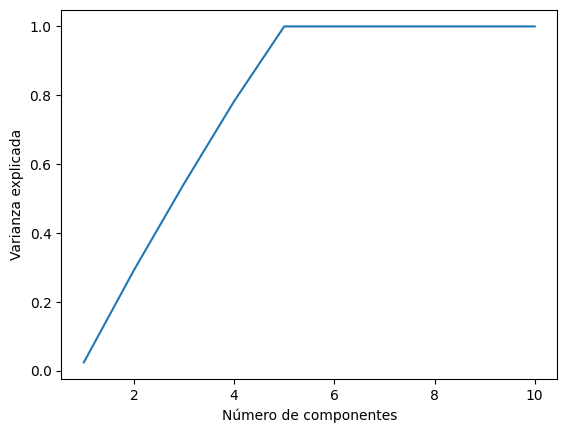

In [33]:
import matplotlib.pyplot as plt

# Calcular la varianza explicada por cada número de componentes
varianza_explicada = []
for i in range(1, 11):
    lsa = TruncatedSVD(n_components=i)
    lsa_vectors = lsa.fit_transform(tdm)
    varianza_explicada.append(lsa.explained_variance_ratio_.sum())

# Gráfico de la varianza explicada vs número de componentes
plt.plot(range(1, 11), varianza_explicada)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.show()

En este caso, la gráfica indica que a medida que se aumenta el número de temas, la varianza explicada aumenta, pero luego se mantiene constante desde los valores 5 hasta el 10. Esto indica que los primeros 5 temas explican una gran cantidad de la varianza en los datos, pero el resto de temas no aportan mucha información adicional. Es posible que estos sean muy similares entre sí o que contengan información redundante. En este caso, considerando que la varianza explicada se mantiene constante a partir del quinto tema, se podría considerar que el número de temas óptimo es cuatro o 5.

Así, a continuación se aplicará 5 a la instancia TruncatedSVD.

In [34]:
lsa = TruncatedSVD(n_components=5)
lsa_vectors = lsa.fit_transform(tdm)

# Obtener las palabras con mayor peso en cada componente
terms = tfidf_vectorizer.get_feature_names_out()
for i, comp in enumerate(lsa.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i+1)+": ")
    for t in sorted_terms:
        print(t)

Topic 1: 
('linguistic', 0.3428557616825953)
('historical', 0.26806767486570815)
('historical linguistic', 0.19810085512571343)
('language', 0.19694105709678697)
('evolutionary', 0.16677051834315224)
('concern', 0.13403383743285407)
('approach', 0.12946148093400808)
('study', 0.12423315074736013)
('study language', 0.12423315074736013)
('branch', 0.08672206964123437)
Topic 2: 
('approach', 0.1533026061874409)
('saussure', 0.13323514030793443)
('evolutionary', 0.13304273202204403)
('speaker', 0.11284267338644485)
('unit', 0.10872018552233641)
('language', 0.0839329906993648)
('ferdinand', 0.07475863289362321)
('ferdinand saussure', 0.07475863289362321)
('1916', 0.07475863289362294)
('analysis', 0.0724801236815576)
Topic 3: 
('unit', 0.17727441730351726)
('analysis', 0.11818294486901153)
('define', 0.11818294486901153)
('element', 0.11818294486901153)
('self', 0.11818294486901153)
('semiotic', 0.11818294486901153)
('structuralism', 0.11818294486901153)
('saussure', 0.10881660864509775)
(

Ahora, se puede observar que el cuarto tema es "evolutionary" y el quinto "change".

**2. Probabilistic Latent Semantic Analysis (PLSA)**

Este es un algoritmo no supervisado de análisis semántico latente cuyo objetivo es encontrar patrones ocultos o temas en un conjunto de datos. Es un enfoque probabilístico para el análisis semántico latente.

In [35]:
!pip install plsa

Ahora, se importarán las librerias necesarias para el procesamiento del texto, como "plsa" y "nltk", descragando las versión más reciente.


In [36]:
from plsa import Corpus, Pipeline, Visualize
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Asimismo, se creará una instancia de la clase "pipeline" con unas etapas de procesamiento de texto predefinidas.

In [37]:
pipeline = Pipeline(*DEFAULT_PIPELINE)
pipeline


Pipeline:
0: remove_non_ascii
1: to_lower
2: remove_numbers
3: tag_remover
4: punctuation_remover
5: tokenize
6: LemmatizeWords
7: RemoveStopwords
8: short_word_remover

A continuación se creará una instancia de la clase "Corpus" a partir de los textos y el pipeline que se acaba de crear.

La siguientes líneas de código se presentan para solucionar el error que generaba la instancia "Corpus".

In [38]:
nltk.download('averaged_perceptron_tagger') #Solucionan el error generado por la instancia "Corpus".
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [39]:
corpus = Corpus(texts, pipeline)
corpus

Corpus:
Number of documents: 5
Number of words:     46

Ahora, se especifica el número de temas, que en este caso serán 4 y se creará la instancia de la clase "PLSA" con el corpus, el número de temas y una bandera que indica si se desea ver el progreso del algortimo.

In [42]:
n_topics = 4
plsa = PLSA(corpus, n_topics, True)
plsa

PLSA:
====
Number of topics:     4
Number of documents:  5
Number of words:      46
Number of iterations: 0

Se utiliza el método "fit" para ajustar el modelo PLSA al corpus.

In [43]:
result = plsa.fit()
plsa

PLSA:
====
Number of topics:     4
Number of documents:  5
Number of words:      46
Number of iterations: 24

Se utiliza el método "best_of" para seleccionar la mejor configuración de resultados de los últimos 5 ajustes.

In [44]:
result = plsa.best_of(5)
result

PlsaResult:
Number of topics:    4
Number of documents: 5
Number of words:     46

Se imprimen los temas y las palabras más probables de cada tema.

In [45]:
for i, topic in enumerate(result.word_given_topic):
   print("Topic "+str(i+1)+": ")
   for term in topic[:10]:
     print(term)

Topic 1: 
('system', 0.14202523260516237)
('unit', 0.10651892445387176)
('analysis', 0.07101261630258118)
('structuralism', 0.07101261630258118)
('element', 0.07101261630258118)
('saussure', 0.06064370612994228)
('course', 0.03550630815129059)
('today', 0.03550630815129059)
('part', 0.03550630815129059)
('work', 0.03550630815129059)
Topic 2: 
('speaker', 0.18032916165600862)
('account', 0.09016458082800431)
('hearer', 0.09016458082800431)
('side', 0.09016458082800431)
('need', 0.09016458082800431)
('community', 0.09016458082800431)
('functionalism', 0.09016458082800431)
('structuralist', 0.09016458082800431)
('approach', 0.05723540012016805)
('ferdinand', 0.05133284649977896)
Topic 3: 
('subfield', 0.09226029405166732)
('sociobiology', 0.09226029405166732)
('development', 0.09226029405166732)
('origin', 0.09226029405166732)
('nature', 0.09226029405166732)
('product', 0.09226029405166732)
('biolinguistics', 0.09226029405166732)
('anthropology', 0.09226029405166732)
('psychology', 0.0922

Así, ahora los temas obtenidos serían "system", "speaker", "subfield" y "relatedness".

**3. Latent Dirichlet Allocation(LDA)**

 El Latent Dirichlet Allocation utiliza un enfoque de inferencia bayesiana para obtener temas en un conjunto de documentos. én este caso, se utilizará la librería sklearn para realizar el análisis y se empleará la clase LatentDirichletAllocation para ajustar el modelo LDA. Tabién se utilizará la clase CountVectorizer para crear una matriz de términos-documentos y para obtener los nombres de las características. Luego, se empleará la función .score() para obtener la suma de las desviaciones cuadráticas (SSE) y graficar el número de temas contra la SSE para determinar el número óptimo de temas.

Primero se creará una matriz de términos-documentos utilizando el método CountVectorizer de scikit-learn. Depués se utilizará la clase LatenDirichletAllocation para el realizar el modelado.

Se empleará CountVectorizer en vez de TfidfVectorizer para crear la matriz de términos-documentos, ya que LDA se basa en la frecuencia de los términos en los documentos, no es un importancia relativa, que es lo que hace TF-IDF.

In [46]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Crear una matriz de términos-documentos
cv = CountVectorizer(stop_words="english")
X = cv.fit_transform(texts_lem)

Ahorá, se ajustarán varios modelos de LDA con diferentes números de temas. Se obtendrá la SSE de cada modelo contra el número de temas. Una vez se haya obtenido la gráfica, se podrá seleccionar el número de temas en el punto donde la SSE comienza a disminuir significativamente.

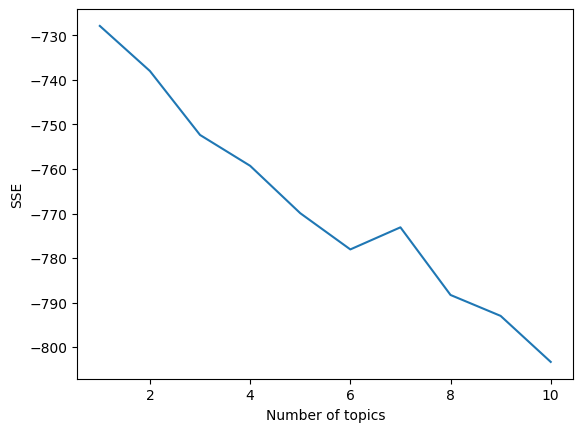

In [47]:
# Ajustar varios modelos de LDA con diferentes números de temas
n_topics = range(1, 11)
sse = []
for n in n_topics:
  lda = LatentDirichletAllocation(n_components=n)
  lda.fit(X)
  sse.append(lda.score(X))

# Graficar la SSE versus el número de temas
plt.plot(n_topics, sse)
plt.xlabel('Number of topics')
plt.ylabel('SSE')
plt.show()

En este caso, se puede ver que la disminución es significativa del 1 al 6. En el 7 vuelve a subir y, a partir de ahí, a bajar.

In [48]:
# Realizar el topic modeling con LDA
lda = LatentDirichletAllocation(n_components=4)
lda.fit(X)

LatentDirichletAllocation(n_components=4)

Ahora, se establecerá el número de temas deseados y se ajustará el modelo a la matriz de términos-documentos.

Para obtener los temas extraídos, se puede acceder a los temas y las palabras más probables de cada tema empleando las propiedades components_ y feature_names_ del objeto lda.

Se empleará un ciclo para imprimir cada tema y las palabras más probables de cada tema. La función argsort se utilizará para ordenar las palabras según su probabilidad en cada tema.

Así, aparecerá el listado de los temas con sus palabras más probables.

In [49]:
# Obtener los temas y las palabras más probables de cada tema
topics = lda.components_
feature_names = cv.get_feature_names_out()
for topic_idx, topic in enumerate(topics):
    print("Topic {}:".format(topic_idx + 1))
    terms = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    for i, term in enumerate(terms):
        print(term, topic[i])

Topic 1:
concern 0.2500412124367891
historical 0.25002573262745353
linguistic 0.25002573262745353
language 0.25001548173036214
establish 0.25002573262745353
compare 0.2500139123491835
branch 0.2500217611735961
relatedness 0.2500574065231301
comparative 0.25001548173036214
diachronic 0.2500217611735961
Topic 2:
linguistic 0.2500138801514005
evolutionary 0.250008726640811
language 0.250008726640811
approach 0.25000515722041117
study 0.250008726640811
historical 0.25000463451703436
interested 1.2499628037288377
especially 3.2511921281930922
sociobiological 0.25000515722041117
darwinian 1.2499628037288377
Topic 3:
saussure 1.2500429444935066
unit 0.25000770010333645
self 0.25000770010333645
structuralism 1.2499728244428676
analysis 0.25000770010333645
define 2.2499755790508638
semiotic 0.2500063578611966
element 1.2488898010283878
language 1.2499728244428676
linguistic 0.2500063578611966
Topic 4:
language 1.2499019629182615
linguistic 1.249957840628381
historical 1.249957840628381
speaker 

En este caso, se puede observar que los dos temas que destacan son "concern", "linguistic", "saussure" y "language".

Como se puede observar, dependiendo del modelo empleado para el modelado de temas se obtienen unos resultados u otros.